In [26]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")
%matplotlib inline

In [9]:
df = pd.read_csv("D:\project\SuperStoreOrders.csv")
print(df.head())

          order_id order_date ship_date       ship_mode    customer_name  \
0     AG-2011-2040   1/1/2011  6/1/2011  Standard Class  Toby Braunhardt   
1    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   
2     HU-2011-1220   1/1/2011  5/1/2011    Second Class    Annie Thurman   
3  IT-2011-3647632   1/1/2011  5/1/2011    Second Class     Eugene Moren   
4    IN-2011-47883   1/1/2011  8/1/2011  Standard Class      Joseph Holt   

       segment            state    country  market   region  ...  \
0     Consumer      Constantine    Algeria  Africa   Africa  ...   
1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
3  Home Office        Stockholm     Sweden      EU    North  ...   
4     Consumer  New South Wales  Australia    APAC  Oceania  ...   

          category sub_category                 product_name sales quantity  \
0  Office Supplies      Storage          Tenex Lockers,

In [10]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [12]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['ship_date'] = df['ship_date'].astype('datetime64[ns]')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [19]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [13]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [14]:
df['sales'] = df['sales'].fillna(0)

In [15]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [16]:
df.nunique()

order_id          25035
order_date         1430
ship_date          1464
ship_mode             4
customer_name       795
segment               3
state              1094
country             147
market                7
region               13
product_id        10292
category              3
sub_category         17
product_name       3788
sales               993
quantity             14
discount             27
profit            24575
shipping_cost     10037
order_priority        4
year                  4
dtype: int64

In [18]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-04-30 17:16:21.384285440,2013-05-05 19:10:10.504971520,152.761318,3.476545,0.142908,28.641740,26.375915,2012.777208
min,2011-01-01 00:00:00,2011-01-02 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2012-06-06 00:00:00,2012-06-13 00:00:00,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-06-26 00:00:00,2013-06-30 00:00:00,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-04-30 00:00:00,2014-05-09 00:00:00,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-07-01 00:00:00,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,199.062579,2.278766,0.212280,174.424113,57.296804,1.098931


In [20]:
df.describe(include='number')


,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,152.761318,3.476545,0.142908,28.641740,26.375915,2012.777208
std,199.062579,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,24.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,68.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,196.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [21]:
#Which segment is the best seller?
df["segment"].value_counts()

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

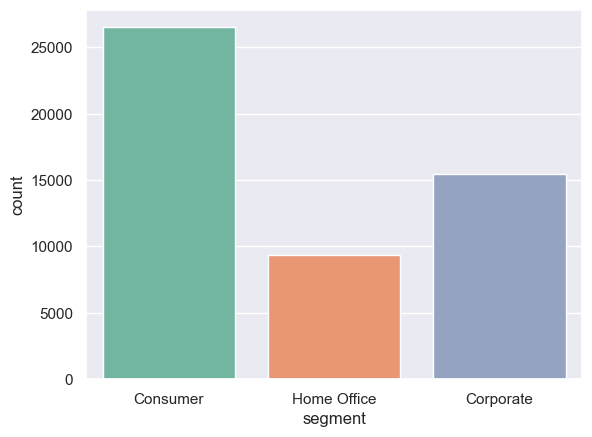

In [33]:
sns.countplot(x='segment', data=df, hue='segment', palette='Set2')
plt.legend([], [], frameon=False)  # remove legend if unwanted
plt.show()


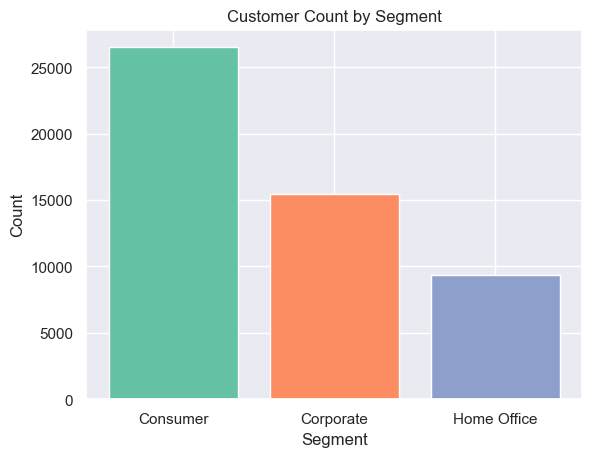

In [38]:
plt.figure()

# Generate different colors automatically
plt.bar(counts.index, counts.values, color=plt.cm.Set2(range(len(counts))))

plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Customer Count by Segment')

plt.show()


The Consumer Segment is the best seller.

QQ  Which Region has the highest order count and In which Region do we need to grow our Business?

In [39]:
df['region'].value_counts()

region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

Cental Region has the highest order count.

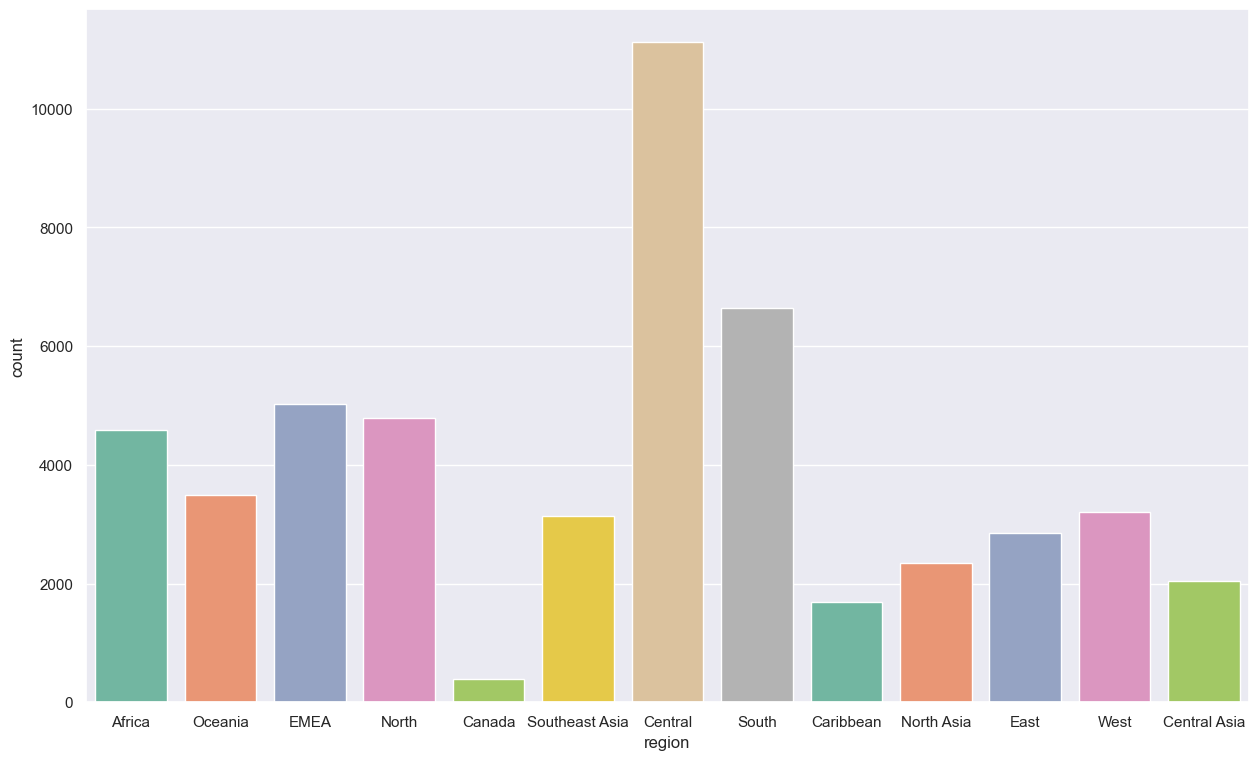

In [41]:
sns.set(rc={'figure.figsize': (15, 9)})
sns.countplot(x='region', data=df, hue='region', palette='Set2')
plt.legend([], [], frameon=False)
plt.show()

Central region performs best.
We should grow business in regions with fewer orders like Canada and Caribbean.